In [14]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Optional
from langgraph.prebuilt import ToolNode

In [15]:
class HRHiringState(TypedDict): 
    role: Optional[str]
    job_description: Optional[str]
    approval: Optional[bool]

In [16]:
def prompt_for_role(state: HRHiringState) -> str:
    role = input("Please enter the role you want to hire for: ")
    return {'role': role}

def generate_jd(state: HRHiringState) -> str:
    role = state['role']
    jd = f'Create a job description for the role of {role}.'
    return {'job_description':jd}

def human_approval(state: HRHiringState) -> bool:
    approval_input = input("Do you approve the JD? (True/False): ").strip().lower()
    approval = approval_input == "True"
    return {"approval": approval}

def post_linkedin(state: HRHiringState) -> str:
    pass


In [17]:
builder = StateGraph(HRHiringState)

# Define Nodes
builder.add_node('prompt_for_role', prompt_for_role)
builder.add_node('generate_jd', generate_jd)
builder.add_node('human_approval', human_approval)
builder.add_node('post_linkedin', post_linkedin)

# Define Edges
builder.add_edge(START, 'prompt_for_role')
builder.add_edge('prompt_for_role', 'generate_jd')
builder.add_edge('generate_jd', 'human_approval')
builder.add_edge('human_approval', 'post_linkedin')

def approval_conditional(state: HRHiringState) -> str:
    return 'post_linkedin' if state['approval'] else 'prompt_for_role'

builder.add_conditional_edges('human_approval', approval_conditional)
builder.add_edge('post_linkedin', END)

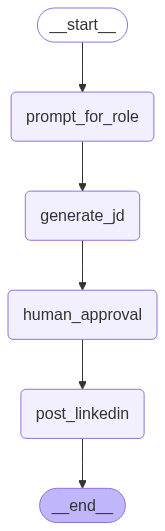

In [18]:
graph = builder.compile()
graph

In [ ]:
# initial_state = HRHiringState(role='Data scientist', job_description='Staff Data scientist', approval=None)
# graph.invoke(initial_state)

In [ ]:
import os
from groq import Groq
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Optional

class HRHiringState(TypedDict): 
    role: Optional[str]
    job_description: Optional[str]
    approval: Optional[bool]

def prompt_for_role(state: HRHiringState) -> str:
    role = input("Please enter the role you want to hire for: ")
    return {'role': role}

def generate_jd(state: HRHiringState) -> dict:
    role = state['role']
    client = Groq(api_key=os.environ.get("GROQ_API_KEY"))
    prompt = f"Write a detailed job description for the role of {role}."
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "user", "content": prompt}
        ],
        model="llama3-8b-8192"
    )
    jd = chat_completion.choices[0].message.content
    return {'job_description': jd}

def human_approval(state: HRHiringState) -> bool:
    approval_input = input("Do you approve the JD? (yes/no): ").strip().lower()
    approval = approval_input == "yes"
    return {"approval": approval}

def post_linkedin(state: HRHiringState) -> dict:
    return {"post_status": "yes posted"}




builder = StateGraph(HRHiringState)

# Define Nodes
builder.add_node('prompt_for_role', prompt_for_role)
builder.add_node('generate_jd', generate_jd)
builder.add_node('human_approval', human_approval)
builder.add_node('post_linkedin', post_linkedin)

# Define Edges
builder.add_edge(START, 'prompt_for_role')
builder.add_edge('prompt_for_role', 'generate_jd')
builder.add_edge('generate_jd', 'human_approval')

def approval_conditional(state: HRHiringState) -> str:
    return 'post_linkedin' if state['approval'] else 'prompt_for_role'

builder.add_conditional_edges('human_approval', approval_conditional)
builder.add_edge('post_linkedin', END)


if __name__ == "__main__":
    graph = builder.compile()
    # final_state = graph.invoke({})
    # print("\nWorkflow complete. Final state:")
    # print(final_state) 
    